In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import arviz as az

c:\miniconda3\envs\cmdstan\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# data
df = pd.read_csv('../AnalysisData/all_data.csv')

In [15]:
df.head()

,Unnamed: 0,Year,Sales of cigarettes per adult per day,death_rate_per_100k,Population,deaths per year
0,0,1950,9.3,23.90,158804397,37954
1,1,1951,9.8,25.08,160872264,40347
2,2,1952,10.0,26.90,163266026,43919
3,3,1953,9.7,28.76,165909996,47716
4,4,1954,9.2,29.73,168736390,50165


In [16]:
df['Sum of sales'] =df["Sales of cigarettes per adult per day"].rolling(15, min_periods=1).sum()

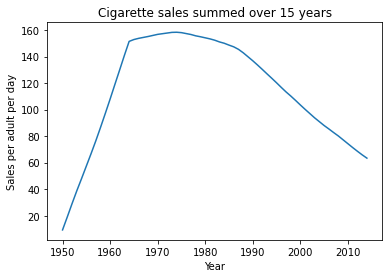

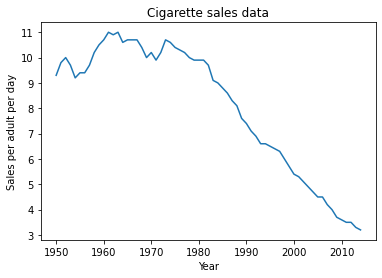

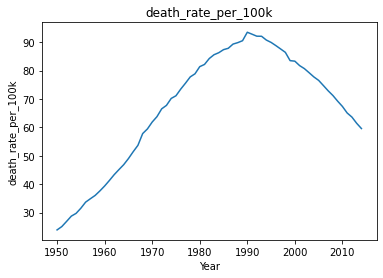

In [17]:

plt.plot(df["Year"], df['Sum of sales'] )
plt.title("Cigarette sales summed over 15 years")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()

plt.plot(df["Year"], df["Sales of cigarettes per adult per day"] )
plt.title("Cigarette sales data")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()


plt.plot(df["Year"], df["death_rate_per_100k"])
plt.title("death_rate_per_100k")
plt.xlabel("Year")
plt.ylabel("death_rate_per_100k")
plt.show()

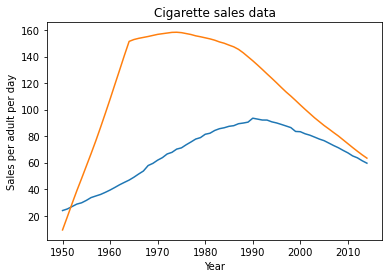

In [18]:
plt.plot(df["Year"], df["death_rate_per_100k"])
plt.plot(df["Year"], df['Sum of sales'] )
plt.title("Cigarette sales data")
plt.xlabel("Year")
plt.ylabel("Sales per adult per day")
plt.show()

In [19]:
df.head()

,Unnamed: 0,Year,Sales of cigarettes per adult per day,death_rate_per_100k,Population,deaths per year,Sum of sales
0,0,1950,9.3,23.90,158804397,37954,9.3
1,1,1951,9.8,25.08,160872264,40347,19.1
2,2,1952,10.0,26.90,163266026,43919,29.1
3,3,1953,9.7,28.76,165909996,47716,38.8
4,4,1954,9.2,29.73,168736390,50165,48.0


In [6]:
input_data = {'N': len(df["deaths per year"]),
              'y': df["deaths per year"],
              'pop': df["Population"]}
model = CmdStanModel(stan_file='./stan_1.stan')
result = model.sample(data=input_data, chains = 1, seed=21370204)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


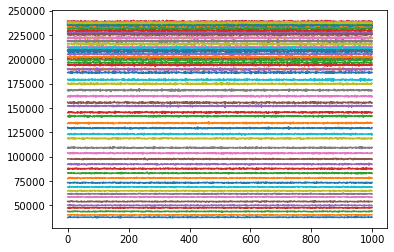

In [9]:
theta =  result.stan_variable('lambda')

